In [ ]:
'''Original Simulation code with peroid of hildas'''

import numpy as np
import vpython as vp
import matplotlib.pyplot as plt
import ode

# VPython modules for animation
vec = vp.vector
mag = lambda x: np.sqrt(x[0]**2 + x[1]**2)

def r3body(y, t):  # equations of motion for restricted 3-body
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors 
    acc = -GM * (b * r1 / mag(r1)**3 + a * r2 / mag(r2)**3)  # acceleration
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis term
    return np.array([v, acc])

def set_scene(r, canvas):  # r = position of test body, canvas for rendering
    body = vp.sphere(pos=vec(r[0], r[1], 0), color=vec(0, 0, 1), radius=0.03, make_trail=True, canvas=canvas)
    sun = vp.sphere(pos=vec(-a, 0, 0), color=vec(1, 0, 0), radius=0.1, canvas=canvas)
    jupiter = vp.sphere(pos=vec(b, 0, 0), color=vec(0, 1, 0), radius=0.05, canvas=canvas)
    circle = vp.ring(pos=vec(0, 0, 0), color=vec(0, 0, 0), thickness=0.005,
                     axis=vec(0, 0, 1), radius=1, canvas=canvas)  # unit circle
    return body

def transform(x, y, omega, t):
    # Create the 2D rotation matrix for the given angle omega and time t
    rotation_matrix = np.array([
        [np.cos(omega * t), np.sin(omega * t)],
        [-np.sin(omega * t), np.cos(omega * t)]
    ])
    return np.dot(rotation_matrix, np.array([x, y]))

def restricted_3body(y, omega):  # y = [r, v] expected
    # Create canvases for animation
    canvas1 = vp.canvas(title='Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=0)
    canvas2 = vp.canvas(title='Non-Rotating Frame', background=vec(1, 1, 1), width=600, height=600, x=600)
    
    # Set up the bodies in both frames
    testbody1 = set_scene(y[0], canvas1)  # Rotating frame
    testbody2 = set_scene(y[0], canvas2)  # Non-rotating frame

    t, h = 0.0, 0.0005  # Initial time and time step
    ylst = []
    t_lst = []
    velocities = []
    step = 0

    # Initialize angle tracking
    sign_changes = 0
    last_angle_sign = np.sign(y[0, 1])

    while sign_changes < 3:  # Stop after the angle changes sign twice
        vp.rate(300)
        y = ode.RK4(r3body, y, t, h)
        
        # Update the position in the rotating frame
        testbody1.pos = vec(y[0, 0], y[0, 1], 0)
        
        # Transform and update for the non-rotating frame
        x, y_pos = y[0, 0], y[0, 1]
        rotated_coords = transform(x, y_pos, omega, t)
        testbody2.pos = vec(rotated_coords[0], rotated_coords[1], 0)
        
        # Check for angle sign change
        current_angle_sign = np.sign(y[0, 1])
        if current_angle_sign != last_angle_sign:
            sign_changes += 1
            last_angle_sign = current_angle_sign
        
        # Store simulation data
        t_lst.append(t)
        ylst.append(np.concatenate([y[0], y[1]]))
        velocities.append(mag(y[1]))
        
        # Increment time
        t += h

    return np.array(ylst), t_lst, velocities


# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha
r, v = [0.64772, 0], [0, 4.2902]

# Run the simulation
ylst, t_lst, velocities = restricted_3body(np.array([r, v]), omega)

# Plot velocity as a function of time
plt.figure(figsize=(8, 6))
plt.plot(t_lst, velocities)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (units)")
plt.title("Velocity of the Test Body as a Function of Time")
plt.grid(True)
plt.show()


def period (GM, ylst):
    
    # Extract x and y values from ylst and compute radial values
    x_values = [state[0] for state in ylst]  # x values are the 1st element of each state
    y_values = [state[1] for state in ylst]  # y values are the 2nd element of each state

    # Compute radial values
    radial_values = [np.sqrt(x**2 + y**2) for x, y in zip(x_values, y_values)]
    
    semi_major = np.max(radial_values)
    
    return (2*np.pi*(np.sqrt((semi_major**3)/GM)))*4333

period(GM, ylst)
    

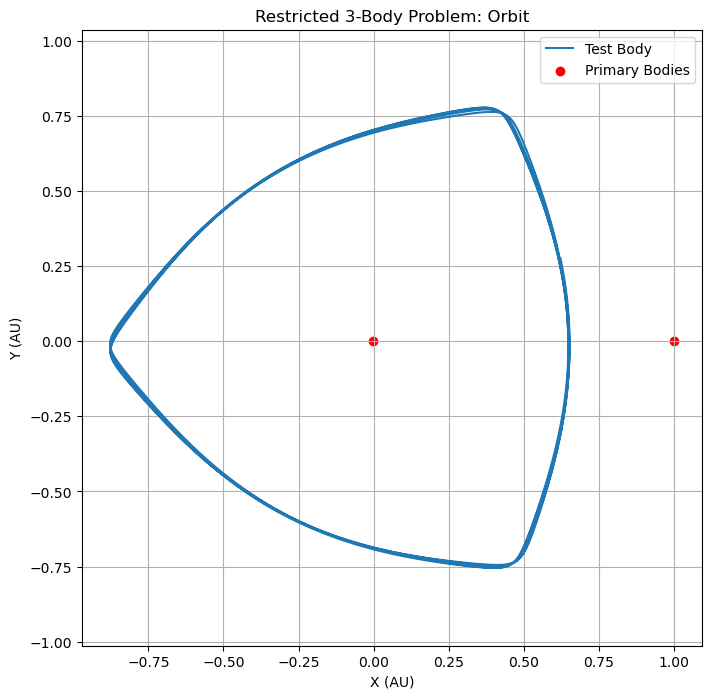

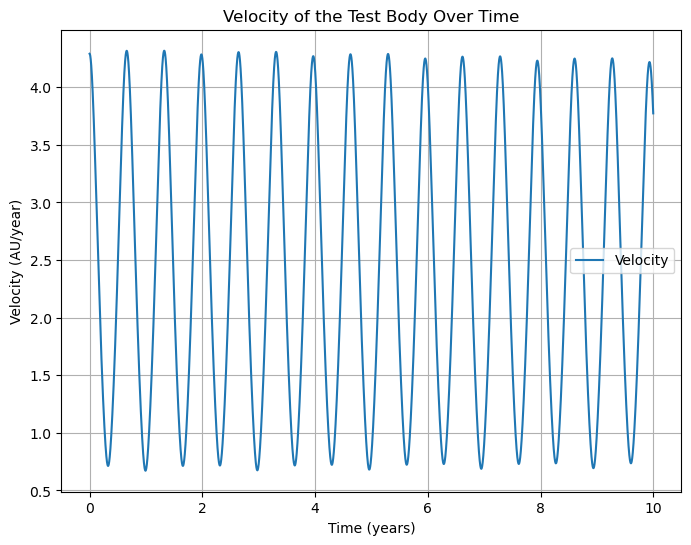

Estimated Orbital Period: 3562.44 days


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode

# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.0009542  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha

# Equations of motion
def r3body(y, t):
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors
    acc = -GM * (b * r1 / np.linalg.norm(r1)**3 + a * r2 / np.linalg.norm(r2)**3)  # gravitational force
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis force
    return np.array([v, acc])

# Run simulation
def simulate_restricted_3body(initial_conditions, t_max, dt):
    t = 0.0
    y = np.array(initial_conditions)  # initial state [position, velocity]
    ylst, t_lst = [], []
    
    while t < t_max:
        y = ode.RK4(r3body, y, t, dt)
        ylst.append(np.concatenate([y[0], y[1]]))  # save position and velocity
        t_lst.append(t)
        t += dt
    
    return np.array(ylst), t_lst

# Initial conditions
r, v = [0.64772, 0], [0, 4.2902]  # initial position and velocity
initial_conditions = [np.array(r), np.array(v)]

# Simulate
t_max = 10  # maximum simulation time
dt = 0.0005  # time step
ylst, t_lst = simulate_restricted_3body(initial_conditions, t_max, dt)

# Plot the orbit
positions = ylst[:, :2]  # extract positions
plt.figure(figsize=(8, 8))
plt.plot(positions[:, 0], positions[:, 1], label="Test Body")
plt.scatter([-a, b], [0, 0], color='red', label="Primary Bodies")  # Sun and Jupiter
plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
plt.title("Restricted 3-Body Problem: Orbit")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()

# Velocity over time
velocities = np.linalg.norm(ylst[:, 2:], axis=1)  # extract velocity magnitudes
plt.figure(figsize=(8, 6))
plt.plot(t_lst, velocities, label="Velocity")
plt.xlabel("Time (years)")
plt.ylabel("Velocity (AU/year)")
plt.title("Velocity of the Test Body Over Time")
plt.grid(True)
plt.legend()
plt.show()

# Orbital Period Calculation
def calculate_period(GM, ylst):
    x_values = ylst[:, 0]  # x positions
    y_values = ylst[:, 1]  # y positions
    radial_values = np.sqrt(x_values**2 + y_values**2)  # radial distances
    semi_major = np.max(radial_values)  # estimate semi-major axis
    period = 2 * np.pi * np.sqrt(semi_major**3 / GM) * 4333  # convert to days
    return period

orbital_period = calculate_period(GM, ylst)
print(f"Estimated Orbital Period: {orbital_period:.2f} days")


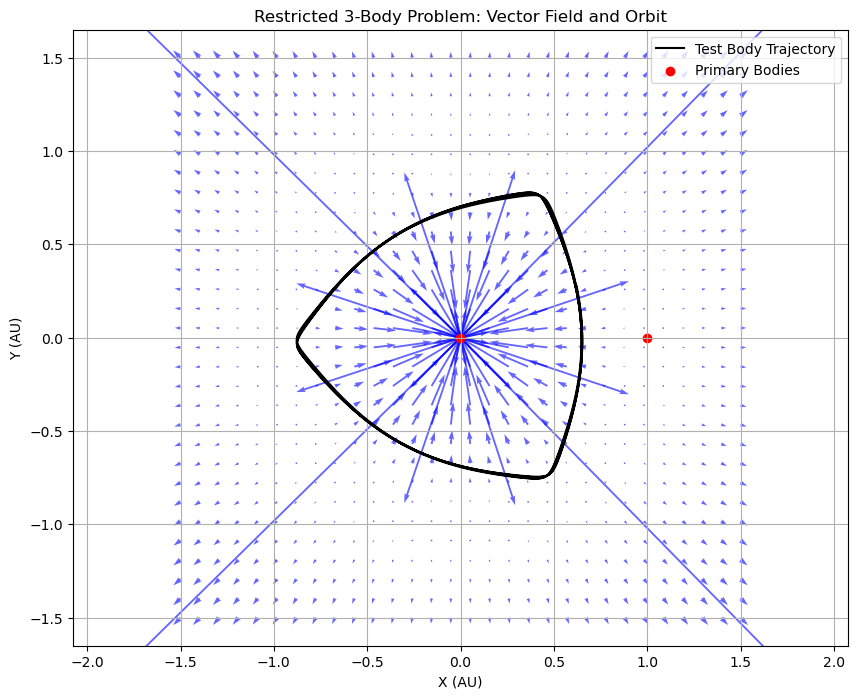

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ode

# Constants
GM, omega = 4 * np.pi**2, 2 * np.pi  # G(M1+M2), omega, RTB units
alpha = 0.121  # Sun-Jupiter system
a, b = alpha, 1.0 - alpha

# Effective potential function and its gradient
def effective_potential(x, y):
    r1 = np.sqrt((x + a)**2 + y**2)
    r2 = np.sqrt((x - b)**2 + y**2)
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * omega**2 * (x**2 + y**2)

def potential_gradient(x, y):
    r1 = np.sqrt((x + a)**2 + y**2)
    r2 = np.sqrt((x - b)**2 + y**2)
    grad_x = GM * ((1 - alpha) * (x + a) / r1**3 + alpha * (x - b) / r2**3) - omega**2 * x
    grad_y = GM * ((1 - alpha) * y / r1**3 + alpha * y / r2**3) - omega**2 * y
    return grad_x, grad_y

# Equations of motion
def r3body(y, t):
    r, v = y[0], y[1]
    r1, r2 = r - [-a, 0], r - [b, 0]  # relative position vectors
    acc = -GM * (b * r1 / np.linalg.norm(r1)**3 + a * r2 / np.linalg.norm(r2)**3)  # gravitational force
    acc += omega**2 * r + 2 * omega * np.array([v[1], -v[0]])  # Coriolis force
    return np.array([v, acc])

# Run simulation
def simulate_restricted_3body(initial_conditions, t_max, dt):
    t = 0.0
    y = np.array(initial_conditions)  # initial state [position, velocity]
    ylst, t_lst = [], []
    
    while t < t_max:
        y = ode.RK4(r3body, y, t, dt)
        ylst.append(np.concatenate([y[0], y[1]]))  # save position and velocity
        t_lst.append(t)
        t += dt
    
    return np.array(ylst), t_lst

# Initial conditions
r, v = [0.64772, 0], [0, 4.2902]  # initial position and velocity
initial_conditions = [np.array(r), np.array(v)]

# Simulate
t_max = 10  # maximum simulation time
dt = 0.0005  # time step
ylst, t_lst = simulate_restricted_3body(initial_conditions, t_max, dt)

# Prepare grid for vector field
x_vals = np.linspace(-1.5, 1.5, 30)  # Coarser grid for arrows
y_vals = np.linspace(-1.5, 1.5, 30)
X, Y = np.meshgrid(x_vals, y_vals)
grad_x, grad_y = potential_gradient(X, Y)  # Compute gradients

# Plot the orbit with the vector field
positions = ylst[:, :2]  # extract positions
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)
plt.plot(positions[:, 0], positions[:, 1], color="black", label="Test Body Trajectory")
plt.scatter([-a, b], [0, 0], color='red', label="Primary Bodies")  # Sun and Jupiter
plt.xlabel("X (AU)")
plt.ylabel("Y (AU)")
plt.title("Restricted 3-Body Problem: Vector Field and Orbit")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


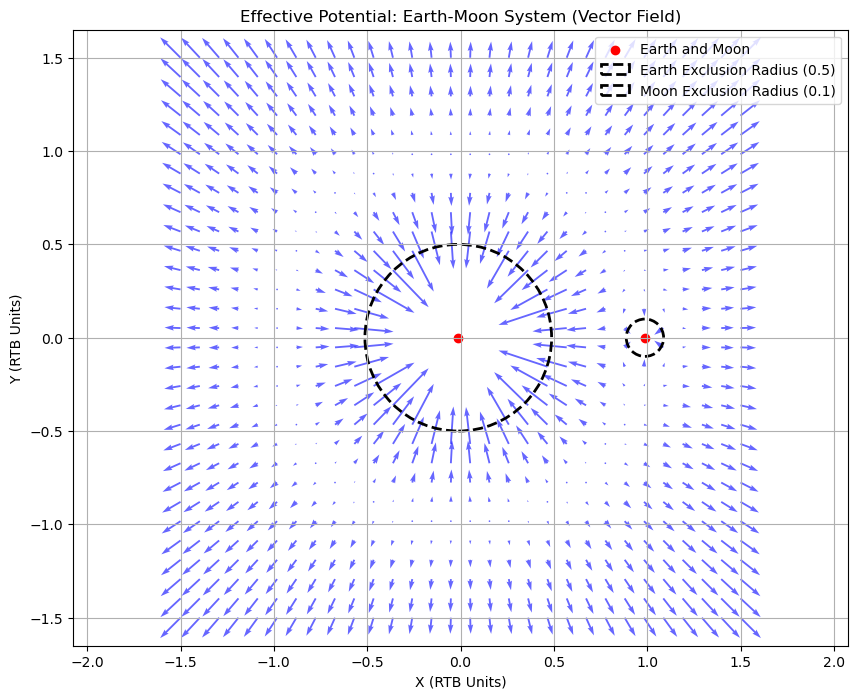

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the Earth-Moon system in RTB units
alpha = 0.0121  # Mass parameter
a, b = -alpha, 1 - alpha  # Earth and Moon positions in RTB units
GM = 4 * np.pi**2  # Gravitational constant in RTB units

# Exclusion radii for Earth and Moon
exclude_radius_earth = 0.5  # Larger radius for Earth (adjustable)
exclude_radius_moon = 0.1   # Smaller radius for Moon (adjustable)

# Effective potential function
def effective_potential(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * GM * (x**2 + y**2)

# Gradient of the potential for vector field
def potential_gradient(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    
    # Mask singularities
    r1_safe = np.maximum(r1, 1e-3)  # Avoid division by zero or near-zero values
    r2_safe = np.maximum(r2, 1e-3)
    
    grad_x = GM * ((1 - alpha) * (x + alpha) / r1_safe**3 + alpha * (x - 1 + alpha) / r2_safe**3) - GM * x
    grad_y = GM * ((1 - alpha) * y / r1_safe**3 + alpha * y / r2_safe**3) - GM * y
    
    # Mask out values near singularities and exclude regions around Earth and Moon
    mask_earth = r1 < exclude_radius_earth
    mask_moon = r2 < exclude_radius_moon
    mask = mask_earth | mask_moon
    grad_x[mask] = np.nan
    grad_y[mask] = np.nan
    
    return grad_x, grad_y

# Grid for plotting
x_vals = np.linspace(-1.5, 1.5, 30)  # Coarser grid for arrows
y_vals = np.linspace(-1.5, 1.5, 30)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute effective potential and its gradient
grad_x, grad_y = potential_gradient(X, Y)

# Plot vector field
plt.figure(figsize=(10, 8))
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot black circles for exclusion radii
circle_earth = plt.Circle((a, 0), exclude_radius_earth, color='black', fill=False, linestyle='--', linewidth=2, label=f"Earth Exclusion Radius ({exclude_radius_earth})")
circle_moon = plt.Circle((b, 0), exclude_radius_moon, color='black', fill=False, linestyle='--', linewidth=2, label=f"Moon Exclusion Radius ({exclude_radius_moon})")
plt.gca().add_artist(circle_earth)
plt.gca().add_artist(circle_moon)

plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Earth-Moon System (Vector Field)")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


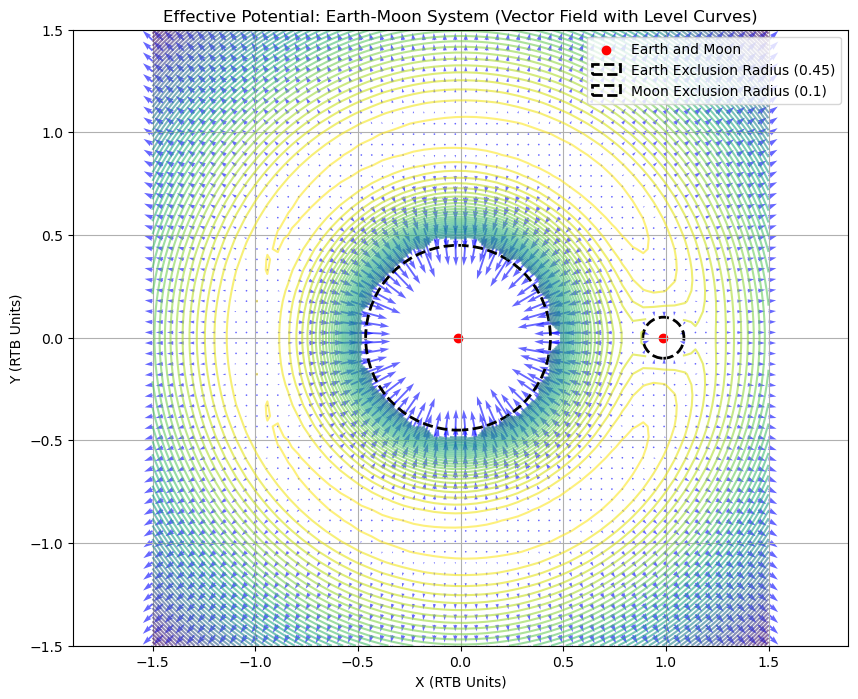

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the Earth-Moon system in RTB units
alpha = 0.0121  # Mass parameter
a, b = -alpha, 1 - alpha  # Earth and Moon positions in RTB units
GM = 4 * np.pi**2  # Gravitational constant in RTB units

# Exclusion radii for Earth and Moon
exclude_radius_earth = 0.45  # Larger radius for Earth (adjustable)
exclude_radius_moon = 0.1   # Smaller radius for Moon (adjustable)

# Effective potential function
def effective_potential(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * GM * (x**2 + y**2)

# Gradient of the potential for vector field
def potential_gradient(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    
    # Mask singularities
    r1_safe = np.maximum(r1, 1e-3)  # Avoid division by zero or near-zero values
    r2_safe = np.maximum(r2, 1e-3)
    
    grad_x = GM * ((1 - alpha) * (x + alpha) / r1_safe**3 + alpha * (x - 1 + alpha) / r2_safe**3) - GM * x
    grad_y = GM * ((1 - alpha) * y / r1_safe**3 + alpha * y / r2_safe**3) - GM * y
    
    # Mask out values near singularities and exclude regions around Earth and Moon
    mask_earth = r1 < exclude_radius_earth
    mask_moon = r2 < exclude_radius_moon
    mask = mask_earth | mask_moon
    grad_x[mask] = np.nan
    grad_y[mask] = np.nan
    
    return grad_x, grad_y

# Grid for plotting
x_vals = np.linspace(-1.5, 1.5, 60)  # Finer grid for better resolution
y_vals = np.linspace(-1.5, 1.5, 60)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute effective potential
Z = effective_potential(X, Y)

# Create exclusion region masks
r1 = np.sqrt((X + alpha)**2 + Y**2)
r2 = np.sqrt((X - 1 + alpha)**2 + Y**2)
mask_earth = r1 < exclude_radius_earth
mask_moon = r2 < exclude_radius_moon
mask_exclusion = mask_earth | mask_moon

# Apply the mask to the potential (set potential values to NaN in exclusion zones)
Z_masked = np.ma.masked_where(mask_exclusion, Z)

# Compute gradient of potential
grad_x, grad_y = potential_gradient(X, Y)

# Define the range for the contours
vmin = np.min(Z_masked)  # Minimum value of the potential
vmax = np.max(Z_masked)  # Maximum value of the potential

# Custom step size for the contours
step_size = 1  # Define the step size between levels (can be adjusted)

# Generate levels manually with custom step size
levels = np.arange(vmin, vmax, step_size)

# Plot vector field and level curves
plt.figure(figsize=(10, 8))

# Plot level curves (contour plot) with masked regions
contours = plt.contour(X, Y, Z_masked, levels=levels, cmap='viridis', alpha=0.6)

# Plot vector field (negative gradient)
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)

# Plot Earth and Moon positions
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot black circles for exclusion radii
circle_earth = plt.Circle((a, 0), exclude_radius_earth, color='black', fill=False, linestyle='--', linewidth=2, label=f"Earth Exclusion Radius ({exclude_radius_earth})")
circle_moon = plt.Circle((b, 0), exclude_radius_moon, color='black', fill=False, linestyle='--', linewidth=2, label=f"Moon Exclusion Radius ({exclude_radius_moon})")
plt.gca().add_artist(circle_earth)
plt.gca().add_artist(circle_moon)

# Add labels and title
plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Earth-Moon System (Vector Field with Level Curves)")

# Show legend, grid, and axis
plt.legend(loc='upper right')
plt.grid(True)
plt.axis("equal")
plt.show()


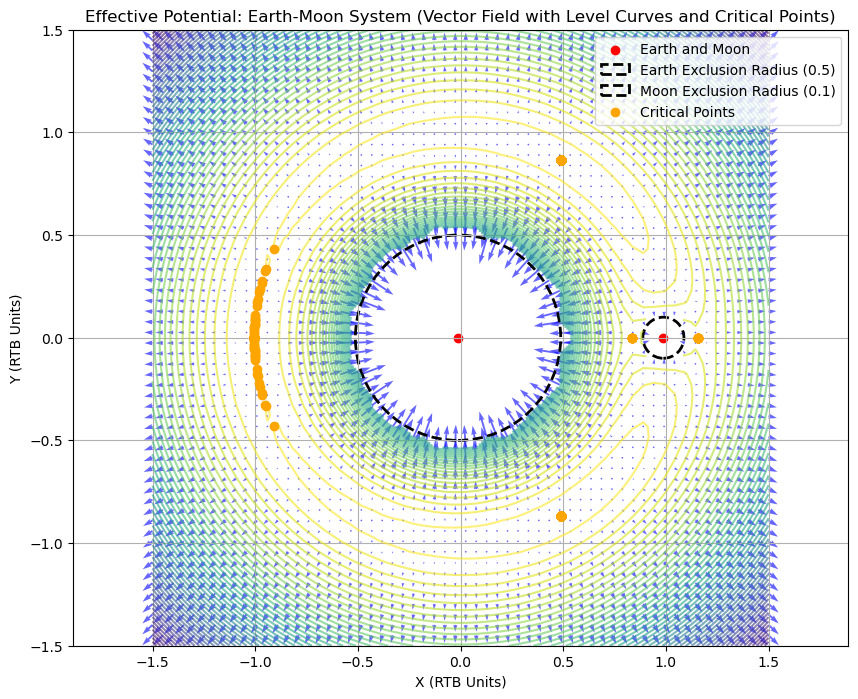

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Constants for the Earth-Moon system in RTB units
alpha = 0.0121  # Mass parameter
a, b = -alpha, 1 - alpha  # Earth and Moon positions in RTB units
GM = 4 * np.pi**2  # Gravitational constant in RTB units

# Exclusion radii for Earth and Moon
exclude_radius_earth = 0.5  # Larger radius for Earth (adjustable)
exclude_radius_moon = 0.1   # Smaller radius for Moon (adjustable)

# Effective potential function
def effective_potential(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * GM * (x**2 + y**2)

# Gradient of the potential for vector field
def potential_gradient(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    
    # Mask singularities
    r1_safe = np.maximum(r1, 1e-3)  # Avoid division by zero or near-zero values
    r2_safe = np.maximum(r2, 1e-3)
    
    grad_x = GM * ((1 - alpha) * (x + alpha) / r1_safe**3 + alpha * (x - 1 + alpha) / r2_safe**3) - GM * x
    grad_y = GM * ((1 - alpha) * y / r1_safe**3 + alpha * y / r2_safe**3) - GM * y
    
    return grad_x, grad_y

# Function to find critical points (gradient == 0)
def find_critical_points():
    def objective_function(point):
        x, y = point
        grad_x, grad_y = potential_gradient(x, y)
        return np.sqrt(grad_x**2 + grad_y**2)  # Minimize the gradient magnitude
    
    # Use a grid search for initial guesses, then optimize
    critical_points = []
    for x_init in np.linspace(-1.5, 1.5, 20):
        for y_init in np.linspace(-1.5, 1.5, 20):
            # Optimize starting from each point on the grid
            result = fmin(objective_function, [x_init, y_init], disp=False)
            critical_points.append(result)
    
    # Remove duplicates (since fmin might find the same critical point multiple times)
    critical_points = np.unique(np.array(critical_points), axis=0)
    
    # Filter critical points to avoid those within exclusion zones
    critical_points = [point for point in critical_points if
                       np.sqrt((point[0] + alpha)**2 + point[1]**2) >= exclude_radius_earth and
                       np.sqrt((point[0] - 1 + alpha)**2 + point[1]**2) >= exclude_radius_moon]
    
    return np.array(critical_points)

# Grid for plotting
x_vals = np.linspace(-1.5, 1.5, 60)  # Finer grid for better resolution
y_vals = np.linspace(-1.5, 1.5, 60)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute effective potential
Z = effective_potential(X, Y)

# Create exclusion region masks
r1 = np.sqrt((X + alpha)**2 + Y**2)
r2 = np.sqrt((X - 1 + alpha)**2 + Y**2)
mask_earth = r1 < exclude_radius_earth
mask_moon = r2 < exclude_radius_moon
mask_exclusion = mask_earth | mask_moon

# Apply the mask to the potential (set potential values to NaN in exclusion zones)
Z_masked = np.ma.masked_where(mask_exclusion, Z)

# Compute gradient of potential
grad_x, grad_y = potential_gradient(X, Y)

# Mask gradients where there are exclusion zones (no vector field arrows in these regions)
grad_x[mask_exclusion] = np.nan
grad_y[mask_exclusion] = np.nan

# Define the range for the contours
vmin = np.min(Z_masked)  # Minimum value of the potential
vmax = np.max(Z_masked)  # Maximum value of the potential

# Custom step size for the contours
step_size = 1  # Define the step size between levels (can be adjusted)

# Generate levels manually with custom step size
levels = np.arange(vmin, vmax, step_size)

# Find critical points
critical_points = find_critical_points()

# Plot vector field and level curves
plt.figure(figsize=(10, 8))

# Plot level curves (contour plot) with masked regions
contours = plt.contour(X, Y, Z_masked, levels=levels, cmap='viridis', alpha=0.6)

# Plot vector field (negative gradient)
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)

# Plot Earth and Moon positions
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot black circles for exclusion radii
circle_earth = plt.Circle((a, 0), exclude_radius_earth, color='black', fill=False, linestyle='--', linewidth=2, label=f"Earth Exclusion Radius ({exclude_radius_earth})")
circle_moon = plt.Circle((b, 0), exclude_radius_moon, color='black', fill=False, linestyle='--', linewidth=2, label=f"Moon Exclusion Radius ({exclude_radius_moon})")
plt.gca().add_artist(circle_earth)
plt.gca().add_artist(circle_moon)

# Plot critical points
plt.scatter(critical_points[:, 0], critical_points[:, 1], color='orange', label="Critical Points", zorder=5)

# Add labels and title
plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Earth-Moon System (Vector Field with Level Curves and Critical Points)")

# Show legend, grid, and axis
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


In [61]:
'''The following is the Jupiter-Sun System'''

'The following is the Jupiter-Sun System'

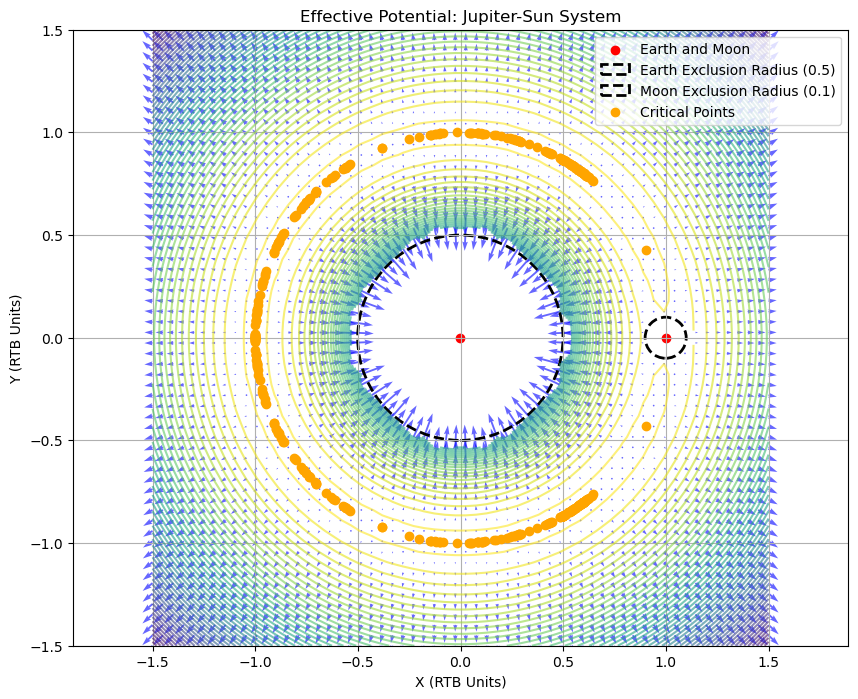

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Constants for the Earth-Moon system in RTB units
alpha = 0.0009542  # Mass parameter
a, b = -alpha, 1 - alpha  # Earth and Moon positions in RTB units
GM = 4 * np.pi**2  # Gravitational constant in RTB units

# Exclusion radii for Earth and Moon
exclude_radius_earth = 0.5  # Larger radius for Earth (adjustable)
exclude_radius_moon = 0.1   # Smaller radius for Moon (adjustable)

# Effective potential function
def effective_potential(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * GM * (x**2 + y**2)

# Gradient of the potential for vector field
def potential_gradient(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    
    # Mask singularities
    r1_safe = np.maximum(r1, 1e-3)  # Avoid division by zero or near-zero values
    r2_safe = np.maximum(r2, 1e-3)
    
    grad_x = GM * ((1 - alpha) * (x + alpha) / r1_safe**3 + alpha * (x - 1 + alpha) / r2_safe**3) - GM * x
    grad_y = GM * ((1 - alpha) * y / r1_safe**3 + alpha * y / r2_safe**3) - GM * y
    
    return grad_x, grad_y

# Function to find critical points (gradient == 0)
def find_critical_points():
    def objective_function(point):
        x, y = point
        grad_x, grad_y = potential_gradient(x, y)
        return np.sqrt(grad_x**2 + grad_y**2)  # Minimize the gradient magnitude
    
    # Use a grid search for initial guesses, then optimize
    critical_points = []
    for x_init in np.linspace(-1.5, 1.5, 20):
        for y_init in np.linspace(-1.5, 1.5, 20):
            # Optimize starting from each point on the grid
            result = fmin(objective_function, [x_init, y_init], disp=False)
            critical_points.append(result)
    
    # Remove duplicates (since fmin might find the same critical point multiple times)
    critical_points = np.unique(np.array(critical_points), axis=0)
    
    # Filter critical points to avoid those within exclusion zones
    critical_points = [point for point in critical_points if
                       np.sqrt((point[0] + alpha)**2 + point[1]**2) >= exclude_radius_earth and
                       np.sqrt((point[0] - 1 + alpha)**2 + point[1]**2) >= exclude_radius_moon]
    
    return np.array(critical_points)

# Grid for plotting
x_vals = np.linspace(-1.5, 1.5, 60)  # Finer grid for better resolution
y_vals = np.linspace(-1.5, 1.5, 60)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute effective potential
Z = effective_potential(X, Y)

# Create exclusion region masks
r1 = np.sqrt((X + alpha)**2 + Y**2)
r2 = np.sqrt((X - 1 + alpha)**2 + Y**2)
mask_earth = r1 < exclude_radius_earth
mask_moon = r2 < exclude_radius_moon
mask_exclusion = mask_earth | mask_moon

# Apply the mask to the potential (set potential values to NaN in exclusion zones)
Z_masked = np.ma.masked_where(mask_exclusion, Z)

# Compute gradient of potential
grad_x, grad_y = potential_gradient(X, Y)

# Mask gradients where there are exclusion zones (no vector field arrows in these regions)
grad_x[mask_exclusion] = np.nan
grad_y[mask_exclusion] = np.nan

# Define the range for the contours
vmin = np.min(Z_masked)  # Minimum value of the potential
vmax = np.max(Z_masked)  # Maximum value of the potential

# Custom step size for the contours
step_size = 1  # Define the step size between levels (can be adjusted)

# Generate levels manually with custom step size
levels = np.arange(vmin, vmax, step_size)

# Find critical points
critical_points = find_critical_points()

# Plot vector field and level curves
plt.figure(figsize=(10, 8))

# Plot level curves (contour plot) with masked regions
contours = plt.contour(X, Y, Z_masked, levels=levels, cmap='viridis', alpha=0.6)

# Plot vector field (negative gradient)
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)

# Plot Earth and Moon positions
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot black circles for exclusion radii
circle_earth = plt.Circle((a, 0), exclude_radius_earth, color='black', fill=False, linestyle='--', linewidth=2, label=f"Earth Exclusion Radius ({exclude_radius_earth})")
circle_moon = plt.Circle((b, 0), exclude_radius_moon, color='black', fill=False, linestyle='--', linewidth=2, label=f"Moon Exclusion Radius ({exclude_radius_moon})")
plt.gca().add_artist(circle_earth)
plt.gca().add_artist(circle_moon)

# Plot critical points
plt.scatter(critical_points[:, 0], critical_points[:, 1], color='orange', label="Critical Points", zorder=5)

# Add labels and title
plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Jupiter-Sun System")

# Show legend, grid, and axis
plt.legend(loc='upper right')
plt.grid(True)
plt.axis("equal")
plt.show()


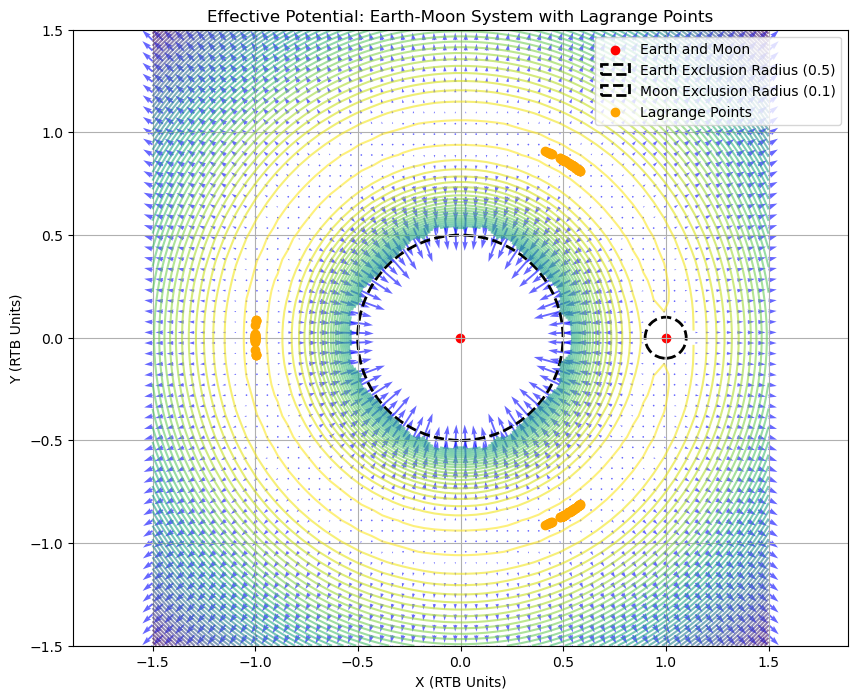

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Constants for the Earth-Moon system in RTB units
alpha = 0.0009542  # Mass parameter
a, b = -alpha, 1 - alpha  # Earth and Moon positions in RTB units
GM = 4 * np.pi**2  # Gravitational constant in RTB units

# Exclusion radii for Earth and Moon
exclude_radius_earth = 0.5  # Larger radius for Earth (adjustable)
exclude_radius_moon = 0.1   # Smaller radius for Moon (adjustable)

# Define known positions of the Lagrange points for the Sun-Jupiter system (relative to the two bodies)
lagrange_points_known = {
    'L1': [0.5, 0],   # Approximate position of L1 in RTB units (this is an estimate)
    'L2': [1.5, 0],   # Approximate position of L2 in RTB units
    'L3': [-1, 0],    # Approximate position of L3 in RTB units
    'L4': [0.5, 0.866],  # Approximate position of L4 (equilateral triangle)
    'L5': [0.5, -0.866]  # Approximate position of L5 (equilateral triangle)
}

# Effective potential function
def effective_potential(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * GM * (x**2 + y**2)

# Gradient of the potential for vector field
def potential_gradient(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    
    # Mask singularities
    r1_safe = np.maximum(r1, 1e-3)  # Avoid division by zero or near-zero values
    r2_safe = np.maximum(r2, 1e-3)
    
    grad_x = GM * ((1 - alpha) * (x + alpha) / r1_safe**3 + alpha * (x - 1 + alpha) / r2_safe**3) - GM * x
    grad_y = GM * ((1 - alpha) * y / r1_safe**3 + alpha * y / r2_safe**3) - GM * y
    
    return grad_x, grad_y

# Function to find critical points (gradient == 0)
def find_critical_points():
    def objective_function(point):
        x, y = point
        grad_x, grad_y = potential_gradient(x, y)
        return np.sqrt(grad_x**2 + grad_y**2)  # Minimize the gradient magnitude
    
    # Use a grid search for initial guesses, then optimize
    critical_points = []
    for x_init in np.linspace(-1.5, 1.5, 20):
        for y_init in np.linspace(-1.5, 1.5, 20):
            # Optimize starting from each point on the grid
            result = fmin(objective_function, [x_init, y_init], disp=False)
            critical_points.append(result)
    
    # Remove duplicates (since fmin might find the same critical point multiple times)
    critical_points = np.unique(np.array(critical_points), axis=0)
    
    # Filter critical points to avoid those within exclusion zones
    critical_points = [point for point in critical_points if
                       np.sqrt((point[0] + alpha)**2 + point[1]**2) >= exclude_radius_earth and
                       np.sqrt((point[0] - 1 + alpha)**2 + point[1]**2) >= exclude_radius_moon]
    
    return np.array(critical_points)

# Function to find closest Lagrange points
def find_closest_lagrange_points(critical_points, lagrange_points_known, threshold=0.1):
    best_points = []
    for point in critical_points:
        for lagrange_name, lagrange_pos in lagrange_points_known.items():
            distance = np.sqrt((point[0] - lagrange_pos[0])**2 + (point[1] - lagrange_pos[1])**2)
            if distance < threshold:
                best_points.append((lagrange_name, point))
    return best_points

# Grid for plotting
x_vals = np.linspace(-1.5, 1.5, 60)  # Finer grid for better resolution
y_vals = np.linspace(-1.5, 1.5, 60)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute effective potential
Z = effective_potential(X, Y)

# Create exclusion region masks
r1 = np.sqrt((X + alpha)**2 + Y**2)
r2 = np.sqrt((X - 1 + alpha)**2 + Y**2)
mask_earth = r1 < exclude_radius_earth
mask_moon = r2 < exclude_radius_moon
mask_exclusion = mask_earth | mask_moon

# Apply the mask to the potential (set potential values to NaN in exclusion zones)
Z_masked = np.ma.masked_where(mask_exclusion, Z)

# Compute gradient of potential
grad_x, grad_y = potential_gradient(X, Y)

# Mask gradients where there are exclusion zones (no vector field arrows in these regions)
grad_x[mask_exclusion] = np.nan
grad_y[mask_exclusion] = np.nan

# Define the range for the contours
vmin = np.min(Z_masked)  # Minimum value of the potential
vmax = np.max(Z_masked)  # Maximum value of the potential

# Custom step size for the contours
step_size = 1  # Define the step size between levels (can be adjusted)

# Generate levels manually with custom step size
levels = np.arange(vmin, vmax, step_size)

# Find critical points
critical_points = find_critical_points()

# Find the closest critical points to the Lagrange points
best_critical_points = find_closest_lagrange_points(critical_points, lagrange_points_known)

# Plot vector field and level curves
plt.figure(figsize=(10, 8))

# Plot level curves (contour plot) with masked regions
contours = plt.contour(X, Y, Z_masked, levels=levels, cmap='viridis', alpha=0.6)

# Plot vector field (negative gradient)
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)

# Plot Earth and Moon positions
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot black circles for exclusion radii
circle_earth = plt.Circle((a, 0), exclude_radius_earth, color='black', fill=False, linestyle='--', linewidth=2, label=f"Earth Exclusion Radius ({exclude_radius_earth})")
circle_moon = plt.Circle((b, 0), exclude_radius_moon, color='black', fill=False, linestyle='--', linewidth=2, label=f"Moon Exclusion Radius ({exclude_radius_moon})")
plt.gca().add_artist(circle_earth)
plt.gca().add_artist(circle_moon)

# Plot critical points close to Lagrange points
best_critical_points = np.array([point for _, point in best_critical_points])
plt.scatter(best_critical_points[:, 0], best_critical_points[:, 1], color='orange', label="Lagrange Points", zorder=5)

# Add labels and title
plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Jupiter-Sun System")


# Show legend, grid, and axis
plt.legend(loc='upper right')
plt.grid(True)
plt.axis("equal")
plt.show()


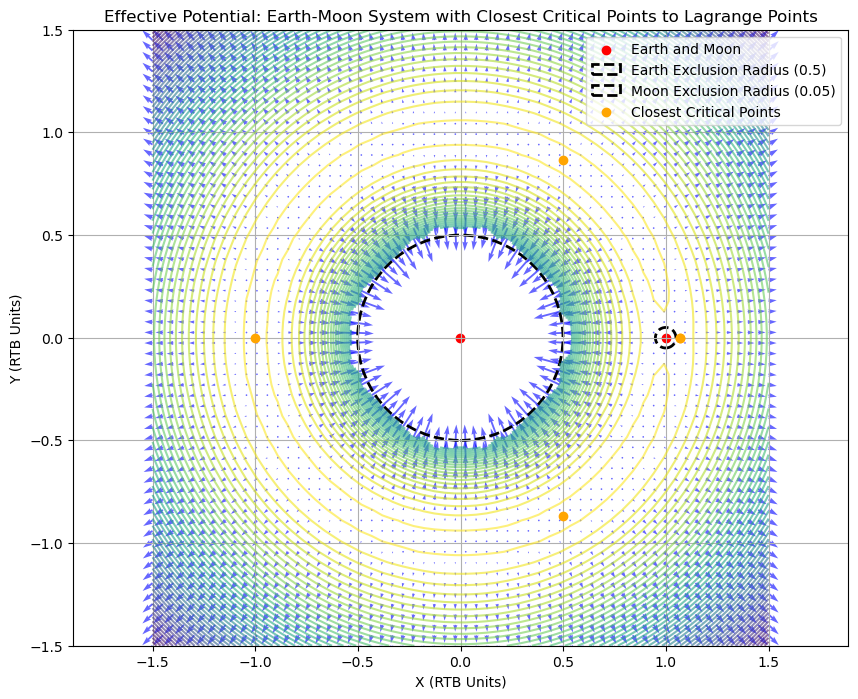

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Constants for the Earth-Moon system in RTB units
alpha = 0.0009542  # Mass parameter
a, b = -alpha, 1 - alpha  # Earth and Moon positions in RTB units
GM = 4 * np.pi**2  # Gravitational constant in RTB units

# Exclusion radii for Earth and Moon
exclude_radius_earth = 0.5  # Larger radius for Earth (adjustable)
exclude_radius_moon = 0.05 # Smaller radius for Moon (adjustable)

# Define known positions of the Lagrange points for the Sun-Jupiter system (relative to the two bodies)
lagrange_points_known = {
    'L1': [0.5, 0],   # Approximate position of L1 in RTB units (this is an estimate)
    'L2': [1.5, 0],   # Approximate position of L2 in RTB units
    'L3': [-1, 0],    # Approximate position of L3 in RTB units
    'L4': [0.5, 0.866],  # Approximate position of L4 (equilateral triangle)
    'L5': [0.5, -0.866]  # Approximate position of L5 (equilateral triangle)
}

# Effective potential function
def effective_potential(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * GM * (x**2 + y**2)

# Gradient of the potential for vector field
def potential_gradient(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    
    # Mask singularities
    r1_safe = np.maximum(r1, 1e-3)  # Avoid division by zero or near-zero values
    r2_safe = np.maximum(r2, 1e-3)
    
    grad_x = GM * ((1 - alpha) * (x + alpha) / r1_safe**3 + alpha * (x - 1 + alpha) / r2_safe**3) - GM * x
    grad_y = GM * ((1 - alpha) * y / r1_safe**3 + alpha * y / r2_safe**3) - GM * y
    
    return grad_x, grad_y

# Function to find critical points (gradient == 0)
def find_critical_points():
    def objective_function(point):
        x, y = point
        grad_x, grad_y = potential_gradient(x, y)
        return np.sqrt(grad_x**2 + grad_y**2)  # Minimize the gradient magnitude
    
    # Use a grid search for initial guesses, then optimize
    critical_points = []
    for x_init in np.linspace(-1.5, 1.5, 20):
        for y_init in np.linspace(-1.5, 1.5, 20):
            # Optimize starting from each point on the grid
            result = fmin(objective_function, [x_init, y_init], disp=False)
            critical_points.append(result)
    
    # Remove duplicates (since fmin might find the same critical point multiple times)
    critical_points = np.unique(np.array(critical_points), axis=0)
    
    # Filter critical points to avoid those within exclusion zones
    critical_points = [point for point in critical_points if
                       np.sqrt((point[0] + alpha)**2 + point[1]**2) >= exclude_radius_earth and
                       np.sqrt((point[0] - 1 + alpha)**2 + point[1]**2) >= exclude_radius_moon]
    
    return np.array(critical_points)

# Function to find the closest critical point to each Lagrange point
def find_closest_lagrange_points(critical_points, lagrange_points_known):
    closest_points = []
    for lagrange_name, lagrange_pos in lagrange_points_known.items():
        # Calculate the distances from the critical points to this Lagrange point
        distances = np.sqrt((critical_points[:, 0] - lagrange_pos[0])**2 + (critical_points[:, 1] - lagrange_pos[1])**2)
        # Find the index of the closest critical point
        closest_idx = np.argmin(distances)
        closest_points.append((lagrange_name, critical_points[closest_idx]))
    return closest_points

# Grid for plotting
x_vals = np.linspace(-1.5, 1.5, 60)  # Finer grid for better resolution
y_vals = np.linspace(-1.5, 1.5, 60)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute effective potential
Z = effective_potential(X, Y)

# Create exclusion region masks
r1 = np.sqrt((X + alpha)**2 + Y**2)
r2 = np.sqrt((X - 1 + alpha)**2 + Y**2)
mask_earth = r1 < exclude_radius_earth
mask_moon = r2 < exclude_radius_moon
mask_exclusion = mask_earth | mask_moon

# Apply the mask to the potential (set potential values to NaN in exclusion zones)
Z_masked = np.ma.masked_where(mask_exclusion, Z)

# Compute gradient of potential
grad_x, grad_y = potential_gradient(X, Y)

# Mask gradients where there are exclusion zones (no vector field arrows in these regions)
grad_x[mask_exclusion] = np.nan
grad_y[mask_exclusion] = np.nan

# Define the range for the contours
vmin = np.min(Z_masked)  # Minimum value of the potential
vmax = np.max(Z_masked)  # Maximum value of the potential

# Custom step size for the contours
step_size = 1  # Define the step size between levels (can be adjusted)

# Generate levels manually with custom step size
levels = np.arange(vmin, vmax, step_size)

# Find critical points
critical_points = find_critical_points()

# Find the closest critical points to the Lagrange points
closest_critical_points = find_closest_lagrange_points(critical_points, lagrange_points_known)

# Plot vector field and level curves
plt.figure(figsize=(10, 8))

# Plot level curves (contour plot) with masked regions
contours = plt.contour(X, Y, Z_masked, levels=levels, cmap='viridis', alpha=0.6)

# Plot vector field (negative gradient)
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)

# Plot Earth and Moon positions
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot black circles for exclusion radii
circle_earth = plt.Circle((a, 0), exclude_radius_earth, color='black', fill=False, linestyle='--', linewidth=2, label=f"Earth Exclusion Radius ({exclude_radius_earth})")
circle_moon = plt.Circle((b, 0), exclude_radius_moon, color='black', fill=False, linestyle='--', linewidth=2, label=f"Moon Exclusion Radius ({exclude_radius_moon})")
plt.gca().add_artist(circle_earth)
plt.gca().add_artist(circle_moon)

# Plot closest critical points to Lagrange points
closest_critical_points = np.array([point for _, point in closest_critical_points])
plt.scatter(closest_critical_points[:, 0], closest_critical_points[:, 1], color='orange', label="Closest Critical Points", zorder=5)

# Add labels and title
plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Earth-Moon System with Closest Critical Points to Lagrange Points")

# Show legend, grid, and axis
plt.legend(loc='upper right')
plt.grid(True)
plt.axis("equal")
plt.show()


  Lagrange Point  Distance to Lagrange (AU)  Potential at Point  \
0             L1                   1.068838          -59.957783   
1             L2                   1.068838          -59.957783   
2             L3                   1.000398          -59.236461   
3             L4                   0.999523          -59.198809   
4             L5                   0.999523          -59.198809   

   Angular Position (degrees)  
0                   -0.000020  
1                   -0.000020  
2                 -179.999374  
3                   60.043212  
4                  -60.043212  


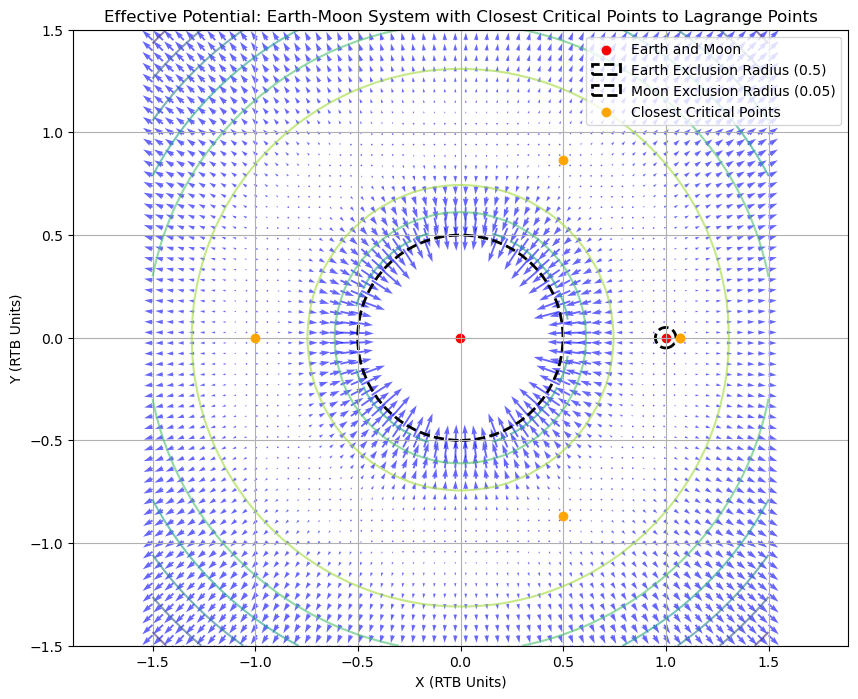

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin

# Constants for the Earth-Moon system in RTB units
alpha = 0.0009542  # Mass parameter
a, b = -alpha, 1 - alpha  # Earth and Moon positions in RTB units
GM = 4 * np.pi**2  # Gravitational constant in RTB units

# Exclusion radii for Earth and Moon
exclude_radius_earth = 0.5  # Larger radius for Earth (adjustable)
exclude_radius_moon = 0.05  # Smaller radius for Moon (adjustable)

# Define known positions of the Lagrange points for the Sun-Jupiter system (relative to the two bodies)
lagrange_points_known = {
    'L1': [0.5, 0],   # Approximate position of L1 in RTB units (this is an estimate)
    'L2': [1.5, 0],   # Approximate position of L2 in RTB units
    'L3': [-1, 0],    # Approximate position of L3 in RTB units
    'L4': [0.5, 0.866],  # Approximate position of L4 (equilateral triangle)
    'L5': [0.5, -0.866]  # Approximate position of L5 (equilateral triangle)
}

# Effective potential function
def effective_potential(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    return -GM * ((1 - alpha) / r1 + alpha / r2) - 0.5 * GM * (x**2 + y**2)

# Gradient of the potential for vector field
def potential_gradient(x, y):
    r1 = np.sqrt((x + alpha)**2 + y**2)
    r2 = np.sqrt((x - 1 + alpha)**2 + y**2)
    
    # Mask singularities
    r1_safe = np.maximum(r1, 1e-3)  # Avoid division by zero or near-zero values
    r2_safe = np.maximum(r2, 1e-3)
    
    grad_x = GM * ((1 - alpha) * (x + alpha) / r1_safe**3 + alpha * (x - 1 + alpha) / r2_safe**3) - GM * x
    grad_y = GM * ((1 - alpha) * y / r1_safe**3 + alpha * y / r2_safe**3) - GM * y
    
    return grad_x, grad_y

# Function to find critical points (gradient == 0)
def find_critical_points():
    def objective_function(point):
        x, y = point
        grad_x, grad_y = potential_gradient(x, y)
        return np.sqrt(grad_x**2 + grad_y**2)  # Minimize the gradient magnitude
    
    # Use a grid search for initial guesses, then optimize
    critical_points = []
    for x_init in np.linspace(-1.5, 1.5, 20):
        for y_init in np.linspace(-1.5, 1.5, 20):
            # Optimize starting from each point on the grid
            result = fmin(objective_function, [x_init, y_init], disp=False)
            critical_points.append(result)
    
    # Remove duplicates (since fmin might find the same critical point multiple times)
    critical_points = np.unique(np.array(critical_points), axis=0)
    
    # Filter critical points to avoid those within exclusion zones
    critical_points = [point for point in critical_points if
                       np.sqrt((point[0] + alpha)**2 + point[1]**2) >= exclude_radius_earth and
                       np.sqrt((point[0] - 1 + alpha)**2 + point[1]**2) >= exclude_radius_moon]
    
    return np.array(critical_points)

# Function to find the closest critical point to each Lagrange point
def find_closest_lagrange_points(critical_points, lagrange_points_known):
    closest_points = []
    for lagrange_name, lagrange_pos in lagrange_points_known.items():
        # Calculate the distances from the critical points to this Lagrange point
        distances = np.sqrt((critical_points[:, 0] - lagrange_pos[0])**2 + (critical_points[:, 1] - lagrange_pos[1])**2)
        # Find the index of the closest critical point
        closest_idx = np.argmin(distances)
        closest_points.append((lagrange_name, critical_points[closest_idx]))
    return closest_points

# Function to calculate the angular position
def angular_position(x, y):
    return np.arctan2(y, x) * (180 / np.pi)  # Convert radians to degrees

# Initialize DataFrame for the results
columns = ['Lagrange Point', 'Distance to Lagrange (AU)', 'Potential at Point', 'Angular Position (degrees)']
lagrange_data = pd.DataFrame(columns=columns)

# Simulate and store results
critical_points = find_critical_points()
closest_critical_points = find_closest_lagrange_points(critical_points, lagrange_points_known)

# Calculate values and store them in DataFrame
for lagrange_name, point in closest_critical_points:
    distance = np.sqrt(point[0]**2 + point[1]**2)  # Distance to origin
    potential_value = effective_potential(point[0], point[1])  # Calculate the potential at the point
    angular_pos = angular_position(point[0], point[1])  # Calculate angular position
    
    new_row = pd.DataFrame({
        'Lagrange Point': [lagrange_name],
        'Distance to Lagrange (AU)': [distance],
        'Potential at Point': [potential_value],
        'Angular Position (degrees)': [angular_pos]  # Add angular position
    })

    lagrange_data = pd.concat([lagrange_data, new_row], ignore_index=True)

# Display the DataFrame
print(lagrange_data)

# Grid for plotting
x_vals = np.linspace(-1.5, 1.5, 60)  # Finer grid for better resolution
y_vals = np.linspace(-1.5, 1.5, 60)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute effective potential
Z = effective_potential(X, Y)

# Create exclusion region masks
r1 = np.sqrt((X + alpha)**2 + Y**2)
r2 = np.sqrt((X - 1 + alpha)**2 + Y**2)
mask_earth = r1 < exclude_radius_earth
mask_moon = r2 < exclude_radius_moon
mask_exclusion = mask_earth | mask_moon

# Apply the mask to the potential (set potential values to NaN in exclusion zones)
Z_masked = np.ma.masked_where(mask_exclusion, Z)

# Compute gradient of potential
grad_x, grad_y = potential_gradient(X, Y)

# Mask gradients where there are exclusion zones (no vector field arrows in these regions)
grad_x[mask_exclusion] = np.nan
grad_y[mask_exclusion] = np.nan

# Plotting the results
plt.figure(figsize=(10, 8))

# Plot level curves (contour plot) with masked regions
contours = plt.contour(X, Y, Z_masked, cmap='viridis', alpha=0.6)

# Plot vector field (negative gradient)
plt.quiver(X, Y, -grad_x, -grad_y, color="blue", alpha=0.6)  # Vector field (negative gradient)

# Plot Earth and Moon positions
plt.scatter([a, b], [0, 0], color="red", label="Earth and Moon")  # Earth and Moon positions

# Plot black circles for exclusion radii
circle_earth = plt.Circle((a, 0), exclude_radius_earth, color='black', fill=False, linestyle='--', linewidth=2, label=f"Earth Exclusion Radius ({exclude_radius_earth})")
circle_moon = plt.Circle((b, 0), exclude_radius_moon, color='black', fill=False, linestyle='--', linewidth=2, label=f"Moon Exclusion Radius ({exclude_radius_moon})")
plt.gca().add_artist(circle_earth)
plt.gca().add_artist(circle_moon)

# Plot closest critical points to Lagrange points
closest_critical_points = np.array([point for _, point in closest_critical_points])
plt.scatter(closest_critical_points[:, 0], closest_critical_points[:, 1], color='orange', label="Closest Critical Points", zorder=5)

# Add labels and title
plt.xlabel("X (RTB Units)")
plt.ylabel("Y (RTB Units)")
plt.title("Effective Potential: Earth-Moon System with Closest Critical Points to Lagrange Points")

# Show legend, grid, and axis
plt.legend(loc='upper right')
plt.grid(True)
plt.axis("equal")
plt.show()
